In [ ]:
import pandas as pd
import numpy as np

: 

# **Data Load and Preprocessing**

In [ ]:
data_set_original = pd.read_excel("src\\components\\dataset\\OnlineRetail.xlsx")

In [ ]:
data_set_original.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data_set_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data_set_original.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
data_set_original.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#how many coutries
print(data_set_original["Country"].nunique())
print(data_set_original["Country"].unique())

38
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [ ]:
#count of values based on country
data_set_original["Country"].value_counts()

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


In [ ]:
(data_set_original["Country"]=="United Kingdom").value_counts()

,count
Country,
True,495478
False,46431


In [ ]:
#which is stock code in united kingdom
data_set_original[data_set_original["Country"]=="United Kingdom"]["StockCode"].unique()

array(['85123A', 71053, '84406B', ..., '47591b', 72783, 23843],
      dtype=object)

In [ ]:
#split object and int
object_col=[]
int_col=[]
date_time=[]
for i in data_set_original:
  if data_set_original[i].dtype=="object":
    object_col.append(i)
  elif data_set_original[i].dtype=="datetime64[ns]":
    date_time.append(i)
  else:
    int_col.append(i)

In [ ]:
object_col

['InvoiceNo', 'StockCode', 'Description', 'Country']

In [ ]:
int_col

['Quantity', 'UnitPrice', 'CustomerID']

In [ ]:
#find Min vale of int col
for col in int_col:
  print(col ,data_set_original[col].min())

Quantity -80995
UnitPrice -11062.06
CustomerID 12346.0


In [ ]:
#find Max vale of int col
for col in int_col:
  print(col ,data_set_original[col].max())

Quantity 80995
UnitPrice 38970.0
CustomerID 18287.0


In [ ]:
#find negative values count

def calculate_neagtive(datas ,column):
  return column ,(datas[column] < 0).sum()


for col in int_col:
  print(calculate_neagtive(data_set_original ,col))

('Quantity', 10624)
('UnitPrice', 2)
('CustomerID', 0)


In [ ]:
#remove the negative values
for col in int_col:
  data_set_original = data_set_original[data_set_original[col] >= 0]

In [ ]:
#after remove negative values
#find Min vale of int col
for col in int_col:
  print(col ,data_set_original[col].min())

Quantity 1
UnitPrice 0.0
CustomerID 12346.0


In [ ]:

#find Max vale of int col
for col in int_col:
  print(col ,data_set_original[col].max())

Quantity 80995
UnitPrice 8142.75
CustomerID 18287.0


In [ ]:
data_set_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [ ]:
#drop invoice
#data_set = data_set_original.drop(columns=['InvoiceNo'])  # Drop only InvoiceNo


In [ ]:
data_set_original.columns

Index(['StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country'],
      dtype='object')

In [ ]:
data_set_original.isna().sum()

,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
data_set_original=data_set_original.reindex()

In [ ]:
data_set_original

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
top_products = data_set_original.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725
ASSORTED COLOUR BIRD ORNAMENT,35362
PACK OF 72 RETROSPOT CAKE CASES,33693
POPCORN HOLDER,30931
RABBIT NIGHT LIGHT,27202


In [ ]:
df =  data_set_original.copy()

# **1. Top-Selling Products (Bar Chart)**

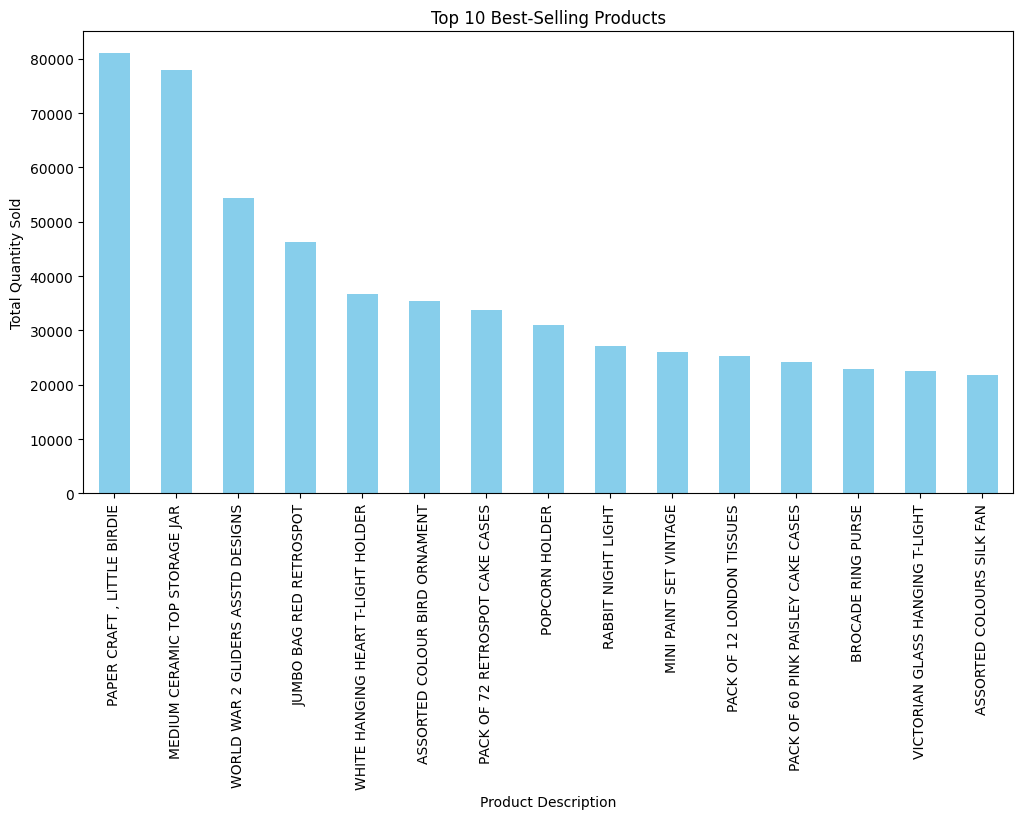

In [ ]:
import matplotlib.pyplot as plt

# Group by product description and sum the quantities ,Display Top 15 Products
top_products = data_set.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=90)
plt.show()


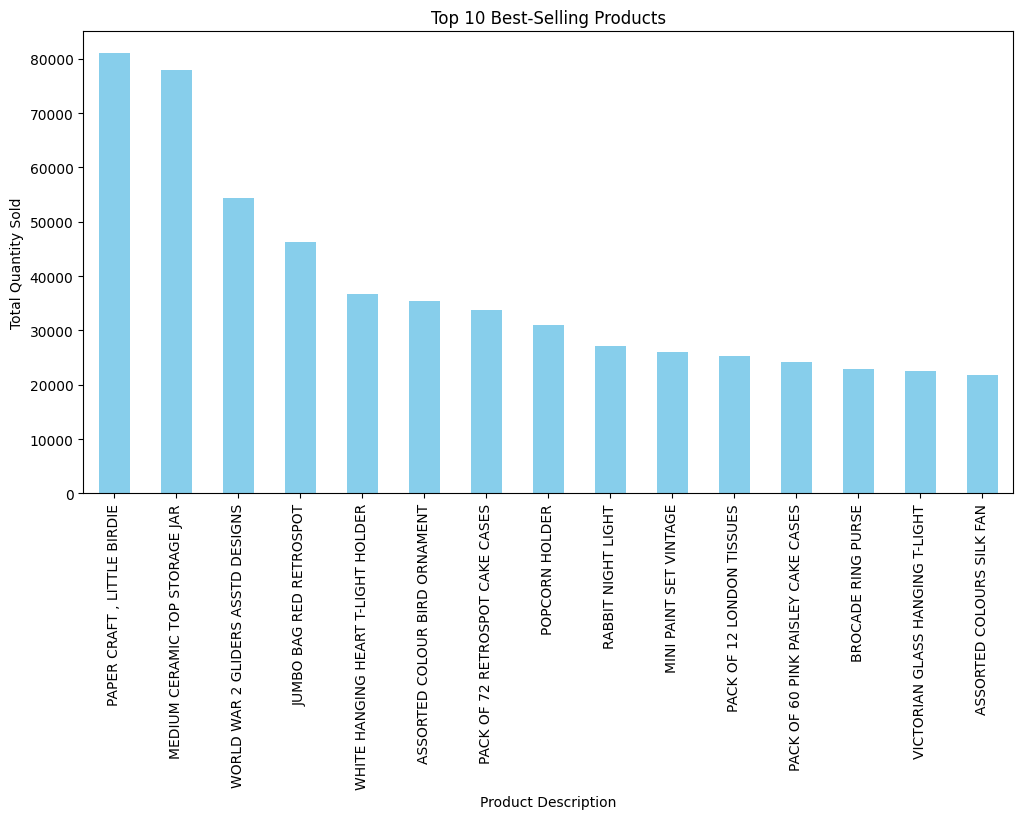

In [ ]:
# Group by product description and sum the quantities which is greater than 10000

products = data_set.groupby('Description')['Quantity'].sum()
top_products = products[products > 10000]
top_products = top_products.sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_selling_products = top_products
print(top_selling_products)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
PACK OF 12 LONDON TISSUES             25345
PACK OF 60 PINK PAISLEY CAKE CASES    24264
BROCADE RING PURSE                    22963
VICTORIAN GLASS HANGING T-LIGHT       22433
ASSORTED COLOURS SILK FAN             21876
Name: Quantity, dtype: int64


# **2. Sales Over Time (Line Plot)**

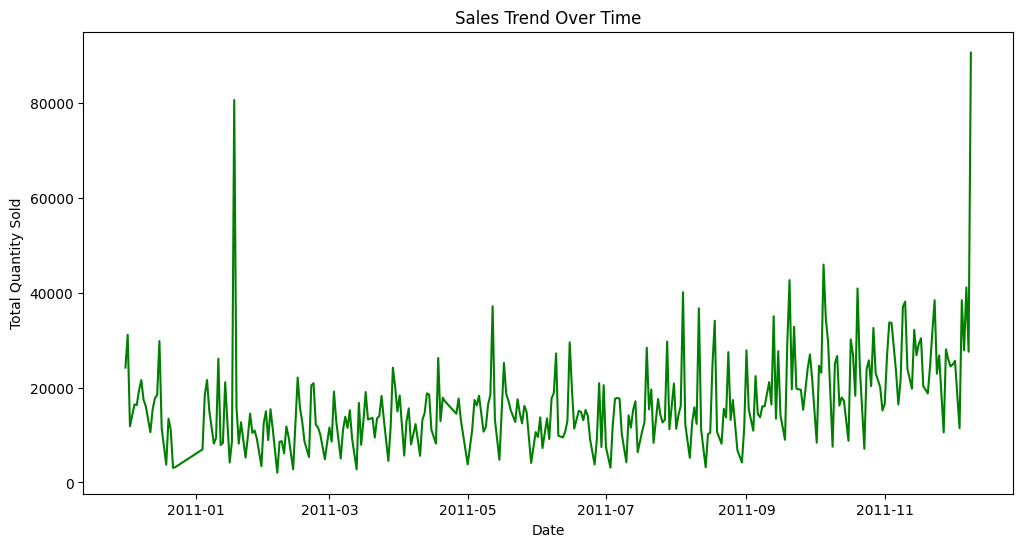

In [ ]:
# Create a new column for date (without time)
df['Date'] = df['InvoiceDate'].dt.date

# Aggregate sales per day
sales_trend = df.groupby('Date')['Quantity'].sum()

# Plot
plt.figure(figsize=(12, 6))
sales_trend.plot(color='green')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.show()


16989.167213114753


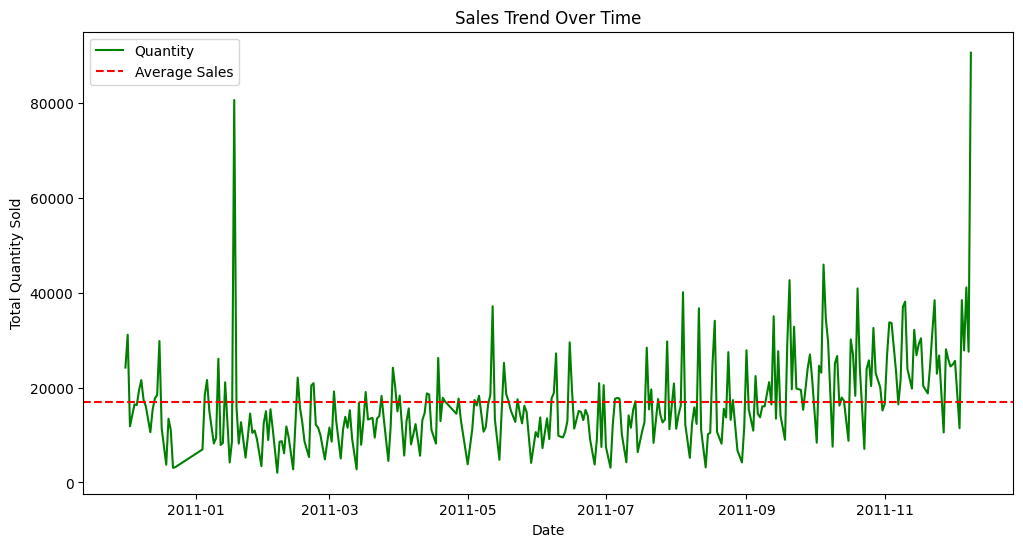

In [ ]:
# Create a new column for date (without time)
df['Date'] = df['InvoiceDate'].dt.date

# Aggregate sales per day
sales_trend = df.groupby('Date')['Quantity'].sum()
#average sales
average_sales = sales_trend.mean()
print(average_sales)
# Plot
plt.figure(figsize=(12, 6))
sales_trend.plot(color='green')
plt.axhline(y=average_sales, color='red', linestyle='--', label='Average Sales')
plt.legend()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.show()


In [ ]:
#find product peaked days  and quatity_sold
peak_days = df.groupby('Date')['Quantity'].sum().sort_values(ascending=False).head(10)
print(peak_days)

Date
2011-12-09    90582
2011-01-18    80618
2011-10-05    45918
2011-09-20    42642
2011-12-07    41102
2011-10-20    40897
2011-08-04    40097
2011-12-05    38428
2011-11-23    38412
2011-11-10    38112
Name: Quantity, dtype: int64


In [ ]:
df

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,10.20
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12.60
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60


# **3. Distribution of Order Prices (Histogram)**

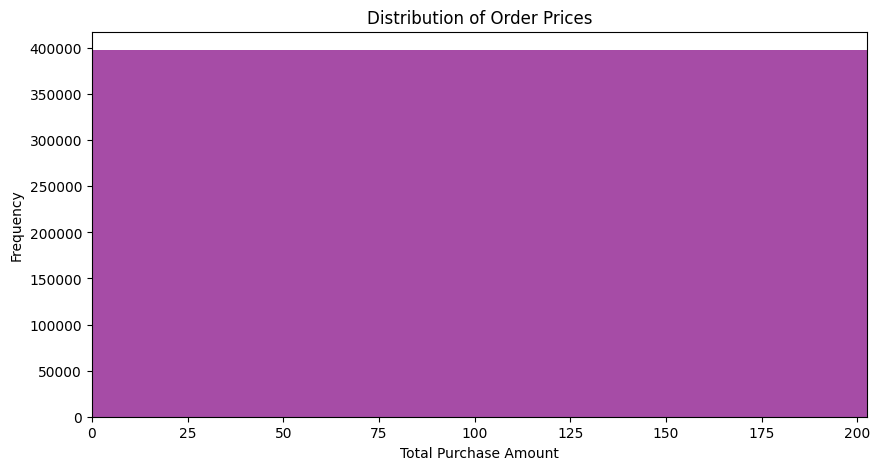

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

plt.figure(figsize=(10, 5))
plt.hist(df['TotalPrice'], bins=50, color='purple', alpha=0.7)
plt.title("Distribution of Order Prices")
plt.xlabel("Total Purchase Amount")
plt.ylabel("Frequency")
plt.xlim(0, df['TotalPrice'].quantile(0.99))  # Exclude extreme values
plt.show()


# **4. Top Purchasing Countries (Bar Chart)**

Country
United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1462
Australia           1185
Name: count, dtype: int64


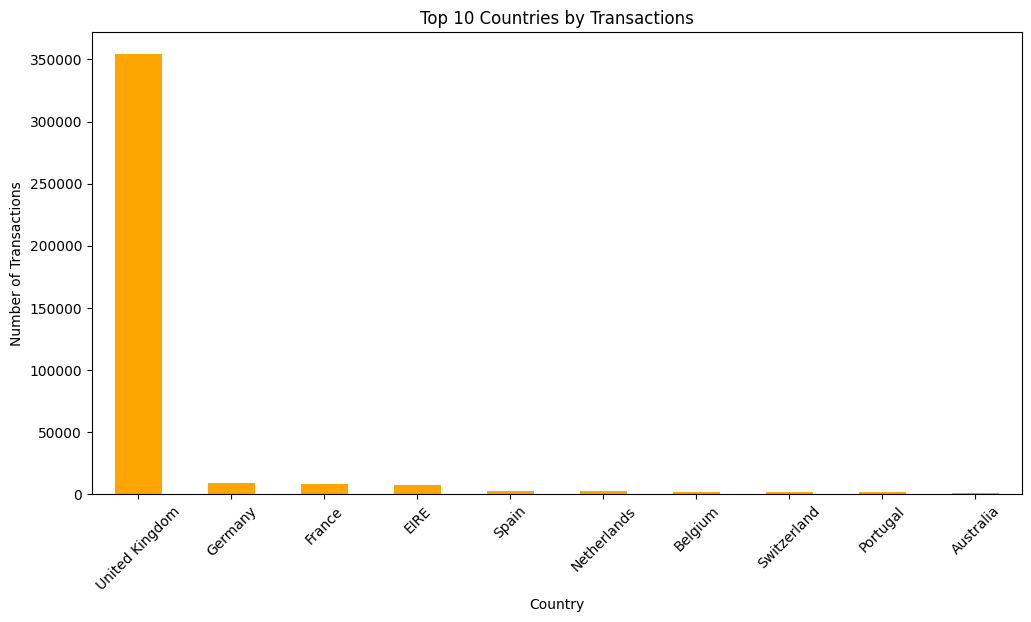

In [ ]:
top_countries = df['Country'].value_counts().head(10)
print(top_countries)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='orange')
plt.title("Top 10 Countries by Transactions")
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


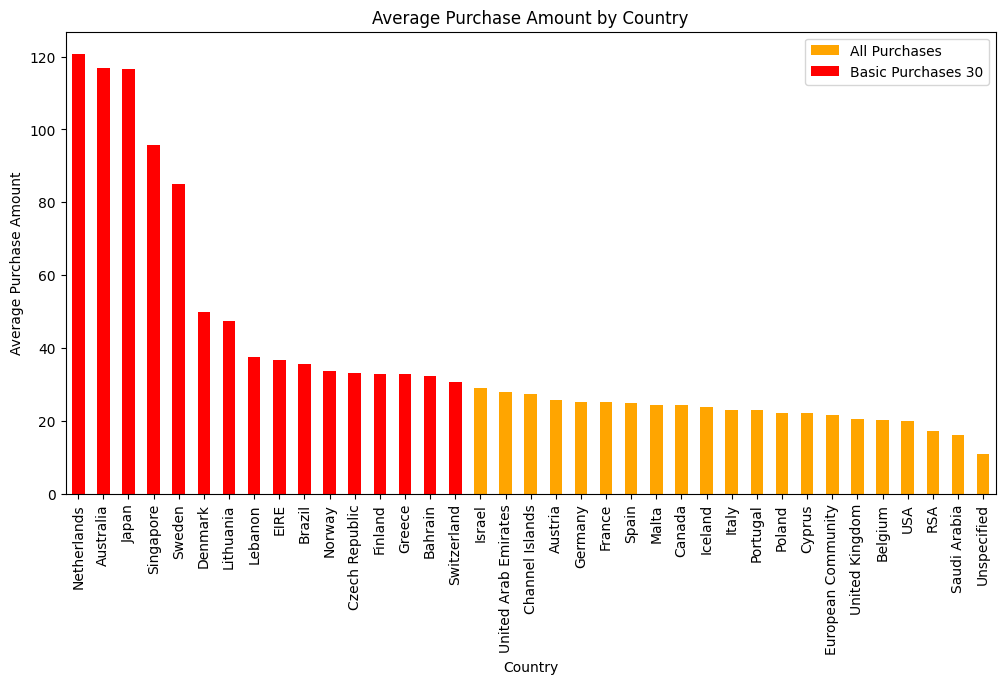

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [ ]:
from re import X
#average purchaing amount each country
average_purchase_amount = df.groupby('Country')['TotalPrice'].mean()
average_purchase_amount = average_purchase_amount.sort_values(ascending=False)
plt.figure(figsize=(12, 6))

basic_pruching_amount = average_purchase_amount.where(average_purchase_amount >30,np.nan)
average_purchase_amount.plot(kind='bar', color='orange')
basic_pruching_amount.plot(kind='bar', color='red')
plt.title("Average Purchase Amount by Country")
plt.xlabel("Country")
plt.ylabel("Average Purchase Amount")
plt.legend(["All Purchases", "Basic Purchases 30"])
plt.show()
plt

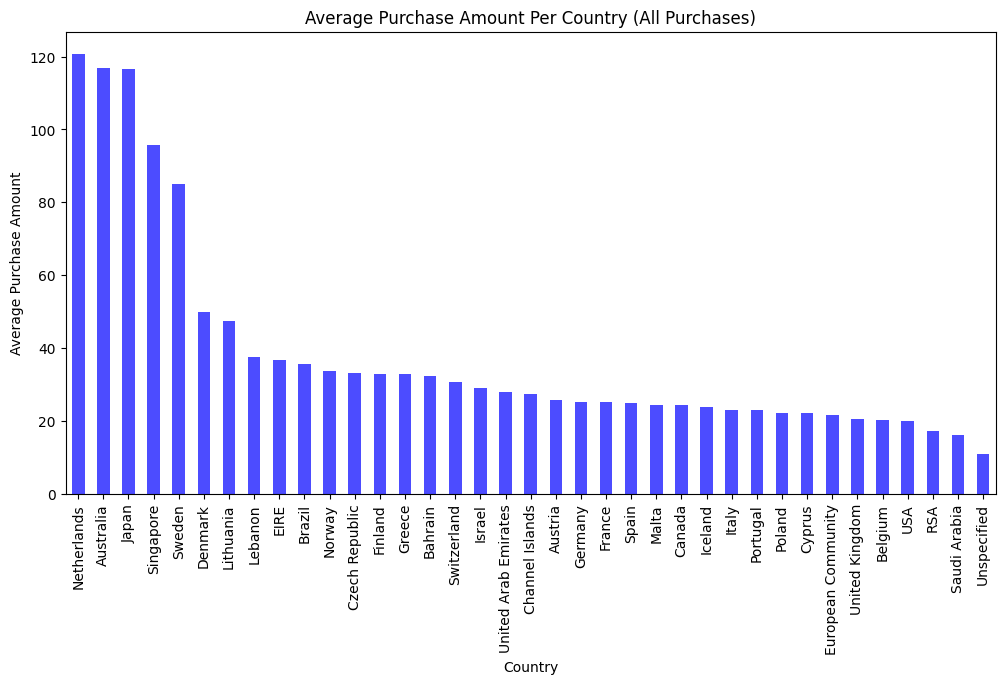

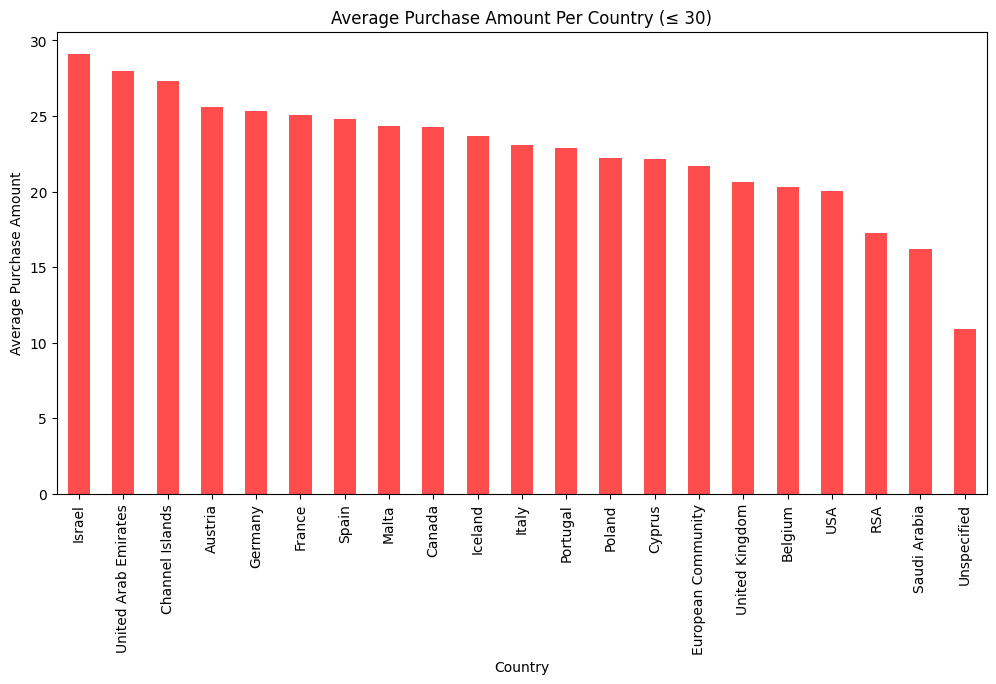

In [ ]:
# Aggregate total spending per country
country_spending = df.groupby('Country')['TotalPrice'].sum()

# Calculate average spending per country
country_avg_spending = df.groupby('Country')['TotalPrice'].mean()

# Separate basic purchases (spending <= 30)
basic_purchases = country_avg_spending[country_avg_spending <= 30]
high_purchases = country_avg_spending[country_avg_spending > 30]

# Plot All Purchases
plt.figure(figsize=(12, 6))
country_avg_spending.sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.7)
plt.title("Average Purchase Amount Per Country (All Purchases)")
plt.xlabel("Country")
plt.ylabel("Average Purchase Amount")
plt.xticks(rotation=90)
plt.show()

# Plot Basic Purchases (≤ 30)
plt.figure(figsize=(12, 6))
basic_purchases.sort_values(ascending=False).plot(kind='bar', color='red', alpha=0.7)
plt.title("Average Purchase Amount Per Country (≤ 30)")
plt.xlabel("Country")
plt.ylabel("Average Purchase Amount")
plt.xticks(rotation=90)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Recommandation_System_DataSet/clean_df.csv"
df.to_csv(path)


Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Recommandation_System_DataSet/clean_dataset.csv"
data_set.to_csv(path)

# **Build Model**

🚀 Insights from Your EDA Results
You've done a great job with your Top-Selling Products, Sales Over Time, and Top Purchasing Countries analysis! Now, let's recognize patterns and derive insights for your recommendation system.

**1️⃣ Top-Selling Products (Bar Chart)**
🧐 Observations
The most sold item is "PAPER CRAFT, LITTLE BIRDIE" with 80,995 sales.

Storage jars, gliders, bags, and tea-light holders are also popular.

A mix of decorative, craft, and household items dominate the list.

**💡 How to Use This for Recommendations?**
**✅ Popularity-Based Recommendation:**

Recommend top-selling items to all customers.

If a customer buys home décor items, suggest other popular décor items.

***✅ Item-Based Filtering:***

If someone buys cake cases, suggest other baking-related items.

If they buy gliders, suggest other toy models or collectibles.

📌 🛠️ Actionable Next Step: *italicized text*
You can create a co-purchase matrix to analyze which items are frequently bought together.

***2️⃣ Sales Over Time (Line Plot)***
🧐 Observations
The highest sales happened on 2011-12-09 (90,582 transactions).

Other spikes are around January, October, and December.

December has 3 high-sale dates, indicating holiday season peaks.

October and November also show significant sales.

💡 How to Use This for Recommendations? **bold text**
***✅ Seasonal Recommendations:***

Promote holiday-themed items in December.

If October-November has high sales, launch fall-themed discounts.

✅ Time-Based Promotions:

Run flash sales on historically high-traffic days.

Use predictive modeling to anticipate future peaks and prepare inventory.

📌 🛠️ Actionable Next Step:
Analyze weekly/monthly trends to refine promotional strategies.

3️⃣ Top Purchasing Countries (Bar Chart)
🧐 Observations
United Kingdom dominates with 354,345 transactions (~89% of all sales).

Other strong markets include Germany, France, and Ireland (EIRE).

Smaller markets include Spain, Netherlands, Belgium, and Australia.

💡 How to Use This for Recommendations?
✅ Location-Based Recommendations:

If a customer is from the UK, recommend best-selling UK items.

If a customer is from Germany, suggest popular items in Germany.

✅ Localization Strategy:

If Spain & Portugal have lower sales, offer localized deals or translation improvements.

Boost marketing efforts in underperforming regions.

📌 🛠️ Actionable Next Step:
Check country-specific preferences and offer localized bundles.

🚀 Next Steps: Implementing a Recommendation System
Now that we see purchasing patterns, you can move to model building:

1️⃣ Popularity-Based Recommender (Best Sellers Overall)
2️⃣ Collaborative Filtering (User-User or Item-Item Similarity)
3️⃣ Market Basket Analysis (Association Rules - "Customers who bought X also bought Y")

In [ ]:
import pandas as pd
import numpy as np

In [ ]:

path = "src\\components\\dataset\\clean_df.csv"
df = pd.read_csv(path)

path = "src\\components\\dataset\\clean_dataset.csv"
data_set = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **STEP - 1**

.
**🔹 Step 1: Popularity-Based Recommendation (Baseline Model)**

In [ ]:
# Recommend top-selling products
popular_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(15)
print(popular_products)


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
PACK OF 12 LONDON TISSUES             25345
PACK OF 60 PINK PAISLEY CAKE CASES    24264
BROCADE RING PURSE                    22963
VICTORIAN GLASS HANGING T-LIGHT       22433
ASSORTED COLOURS SILK FAN             21876
Name: Quantity, dtype: int64


# **STEP - 2**

**🔹 Step 2: Collaborative Filtering (User-Based or Item-Based)**

In [ ]:
!pip install --upgrade pip
!pip install --force-reinstall numpy
!pip install --force-reinstall scikit-surprise


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_6

In [ ]:
import numpy as np
print(np.__version__)


1.23.5


In [ ]:
!pip install numpy==1.23.5


  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 1.40.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires nu

In [ ]:
#find Min Values to max Values in Quantity
print("Max ",df["Quantity"].max())
print("Min ",df["Quantity"].min())

Max  80995
Min  1


Since the dataset maximum quantity is 80,995 and the minimum is 1, we need a better scaling approach to convert purchase quantities into a 1 to 5 rating scale.

In [ ]:
import numpy as np

# Define percentile cutoffs
q1 = np.percentile(df['Quantity'], 20)  # 20th percentile
q2 = np.percentile(df['Quantity'], 40)  # 40th percentile
q3 = np.percentile(df['Quantity'], 60)  # 60th percentile
q4 = np.percentile(df['Quantity'], 80)  # 80th percentile

# Print cutoffs for reference
print(f"Percentile Cutoffs:\nQ1: {q1}, Q2: {q2}, Q3: {q3}, Q4: {q4}")


Percentile Cutoffs:
Q1: 2.0, Q2: 4.0, Q3: 8.0, Q4: 12.0


In [ ]:
def assign_rating(qty):
    if qty <= q1:
        return 1  # Rarely purchased
    elif qty <= q2:
        return 2
    elif qty <= q3:
        return 3
    elif qty <= q4:
        return 4
    else:
        return 5  # Frequently purchased

# Apply function
df['Rating'] = df['Quantity'].apply(assign_rating)

# Check distribution
print(df['Rating'].value_counts())


Rating
1    131317
4     82757
5     65938
2     59131
3     58781
Name: count, dtype: int64


In [ ]:
#find Maximum and Minimum Values in Customer Id
print("Max ",df["CustomerID"].max())
print("Min ",df["CustomerID"].min())

Max  18287.0
Min  12346.0


In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load data with the new rating column
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['CustomerID', 'StockCode', 'Rating']], reader)


In [ ]:

# Train-Test Split
trainset, testset = train_test_split(data, test_size=0.2)

# Apply SVD Model
model = SVD()
model.fit(trainset)

# Make Predictions
predictions = model.test(testset)

# Evaluate Model
print("RMSE:", accuracy.rmse(predictions))

RMSE: 0.7584
RMSE: 0.7583944648353639


In [ ]:
from surprise.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_factors': [50, 100, 150],  # Number of latent factors
    'n_epochs': [20, 50],  # Number of iterations
    'lr_all': [0.002, 0.005, 0.01],  # Learning rate
}

# Perform Grid Search
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
grid_search.fit(data)

# Best Model Parameters
print("Best RMSE Score:", grid_search.best_score['rmse'])
print("Best Parameters:", grid_search.best_params['rmse'])


Best RMSE Score: 0.7551773581582418
Best Parameters: {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.01}


In [ ]:
import pickle as pk

with open('src\\components\\model\\model.pkl', 'wb') as f:
    pk.dump(model)

In [ ]:
# Choose a customer ID (replace with an actual CustomerID from your dataset)
customer_id = 12680.0

# Get all unique product IDs
all_products = df['StockCode'].unique()

# Predict ratings for all products
predictions = [model.predict(customer_id, product) for product in all_products]

# Sort recommendations
top_recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:10]

# Display top recommendations
print("Top Recommended Products for Customer:", customer_id)
for rec in top_recommendations:
    print(f"Product ID: {rec.iid}, Estimated Rating: {rec.est:.2f}")


Top Recommended Products for Customer: 12680.0
Product ID: 85172, Estimated Rating: 5.00
Product ID: 22151, Estimated Rating: 5.00
Product ID: 17003, Estimated Rating: 5.00
Product ID: 16012, Estimated Rating: 5.00
Product ID: 21830, Estimated Rating: 5.00
Product ID: 17084R, Estimated Rating: 5.00
Product ID: 16216, Estimated Rating: 5.00
Product ID: 23233, Estimated Rating: 5.00
Product ID: 23077, Estimated Rating: 5.00
Product ID: 22959, Estimated Rating: 5.00


In [ ]:
# Create a mapping of StockCode to Description
product_mapping = df[['StockCode', 'Description']].drop_duplicates()

# Convert to dictionary for quick lookup
product_dict = dict(zip(product_mapping['StockCode'], product_mapping['Description']))

# Display recommended product names
print("Top Recommended Products for Customer:", customer_id)
for rec in top_recommendations:
    product_id = rec.iid  # Extract Product ID
    product_name = product_dict.get(product_id, "Unknown Product")  # Get name from dictionary
    print(f"Product: {product_name} (ID: {product_id}), Estimated Rating: {rec.est:.2f}")


Top Recommended Products for Customer: 12680.0
Product: HYACINTH BULB T-LIGHT CANDLES (ID: 85172), Estimated Rating: 5.00
Product: PLACE SETTING WHITE HEART (ID: 22151), Estimated Rating: 5.00
Product: BROCADE RING PURSE (ID: 17003), Estimated Rating: 5.00
Product: FOOD/DRINK SPONGE STICKERS (ID: 16012), Estimated Rating: 5.00
Product: ASSORTED CREEPY CRAWLIES (ID: 21830), Estimated Rating: 5.00
Product: ASSORTED INCENSE PACK (ID: 17084R), Estimated Rating: 5.00
Product: LETTER SHAPE PENCIL SHARPENER (ID: 16216), Estimated Rating: 5.00
Product: WRAP POPPIES  DESIGN (ID: 23233), Estimated Rating: 5.00
Product: DOUGHNUT LIP GLOSS (ID: 23077), Estimated Rating: 5.00
Product: WRAP CHRISTMAS VILLAGE (ID: 22959), Estimated Rating: 5.00


# **STEP - 3**

**3️⃣ Combine with Market Basket Analysis (Cross-Selling)**

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare data for Market Basket Analysis
basket = data_set_original.groupby(['InvoiceNo', 'StockCode'])['Quantity'].sum().unstack().fillna(0)
basket = (basket > 0).astype(int)  # Convert to binary

# Apply Apriori Algorithm
frequent_items = apriori(basket, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1)

# Display top association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


  antecedents consequents   support  confidence      lift
0     (20725)     (20726)  0.023360    0.335919  7.593415
1     (20726)     (20725)  0.023360    0.528049  7.593415
2     (20725)     (20727)  0.027892    0.401086  7.067046
3     (20727)     (20725)  0.027892    0.491445  7.067046
4     (20728)     (20725)  0.024763    0.475155  6.832799
5     (20725)     (20728)  0.024763    0.356090  6.832799
6     (20725)     (22382)  0.025194    0.362296  6.797090
7     (22382)     (20725)  0.025194    0.472672  6.797090
8     (20725)     (22383)  0.028000    0.402638  7.155602
9     (22383)     (20725)  0.028000    0.497603  7.155602


In [ ]:
# Create a mapping of StockCode to Description
product_mapping = df[['StockCode', 'Description']].drop_duplicates()
product_dict = dict(zip(product_mapping['StockCode'], product_mapping['Description']))

# Function to map product IDs to names
def map_product_names(product_set):
    return [product_dict.get(item, "Unknown Product") for item in product_set]

# Apply to antecedents & consequents
rules['antecedents'] = rules['antecedents'].apply(lambda x: map_product_names(x))
rules['consequents'] = rules['consequents'].apply(lambda x: map_product_names(x))

# Display readable results
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


                   antecedents                  consequents   support  \
0       [LUNCH BAG RED SPOTTY]         [LUNCH BAG WOODLAND]  0.023360   
1         [LUNCH BAG WOODLAND]       [LUNCH BAG RED SPOTTY]  0.023360   
2       [LUNCH BAG RED SPOTTY]    [LUNCH BAG  BLACK SKULL.]  0.027892   
3    [LUNCH BAG  BLACK SKULL.]       [LUNCH BAG RED SPOTTY]  0.027892   
4        [LUNCH BAG CARS BLUE]       [LUNCH BAG RED SPOTTY]  0.024763   
5       [LUNCH BAG RED SPOTTY]        [LUNCH BAG CARS BLUE]  0.024763   
6       [LUNCH BAG RED SPOTTY]  [LUNCH BAG SPACEBOY DESIGN]  0.025194   
7  [LUNCH BAG SPACEBOY DESIGN]       [LUNCH BAG RED SPOTTY]  0.025194   
8       [LUNCH BAG RED SPOTTY]      [LUNCH BAG SUKI DESIGN]  0.028000   
9      [LUNCH BAG SUKI DESIGN]       [LUNCH BAG RED SPOTTY]  0.028000   

   confidence      lift  
0    0.335919  7.593415  
1    0.528049  7.593415  
2    0.401086  7.067046  
3    0.491445  7.067046  
4    0.475155  6.832799  
5    0.356090  6.832799  
6    0.362296 

# **Final Full Recommendation Fuction**

In [ ]:
def collaborativeFilering(customer_id):
  # Choose a customer ID (replace with an actual CustomerID from your dataset)


  # Get all unique product IDs
  all_products = df['StockCode'].unique()

  # Predict ratings for all products
  predictions = [model.predict(customer_id, product) for product in all_products]

  # Sort recommendations
  top_recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:10]

  # Create a mapping of StockCode to Description
  product_mapping = df[['StockCode', 'Description']].drop_duplicates()

  # Convert to dictionary for quick lookup
  product_dict = dict(zip(product_mapping['StockCode'], product_mapping['Description']))

  # Display recommended product names
  print("Top Recommended Products for Customer:", customer_id)
  for rec in top_recommendations:
      product_id = rec.iid  # Extract Product ID
      product_name = product_dict.get(product_id, "Unknown Product")  # Get name from dictionary
      print(f"Product: {product_name} (ID: {product_id}), Estimated Rating: {rec.est:.2f}")



In [ ]:
def get_recommendations(customer_id, num_cf=5, num_mba=3):
    """
    Generate product recommendations for a given customer using:
    1. Collaborative Filtering (CF) - Personalized recommendations
    2. Market Basket Analysis (MBA) - Frequently bought together products
    """
    # ========== Collaborative Filtering (SVD) ==========
    all_products = df['StockCode'].unique()
    predictions = [model.predict(customer_id, product) for product in all_products]

    # Sort recommendations by estimated rating
    top_cf = sorted(predictions, key=lambda x: x.est, reverse=True)[:num_cf]

    # Convert Product IDs to Names
    cf_recommendations = [(product_dict.get(rec.iid, "Unknown Product"), rec.est) for rec in top_cf]

    # ========== Market Basket Analysis ==========
    mba_recommendations = []

    for product_id, _ in cf_recommendations:
        # Find the most frequent co-purchased items
        mba_related = rules[rules['antecedents'].apply(lambda x: product_id in x)]

        # Get top co-purchased items
        top_mba = mba_related[['consequents', 'confidence', 'lift']].sort_values(by=['confidence', 'lift'], ascending=False).head(num_mba)

        # Convert to readable names
        for _, row in top_mba.iterrows():
            mba_recommendations.append((row['consequents'], row['confidence']))

    # Display recommendations
    print(f"🔹 **Top {num_cf} Personalized Recommendations for Customer {customer_id}** (Collaborative Filtering)")
    for name, rating in cf_recommendations:
        print(f"⭐ {name} (Estimated Rating: {rating:.2f})")

    print("\n🔹 **Frequently Bought Together Items (Market Basket Analysis)**")
    for name, conf in mba_recommendations:
        print(f"🛍️ {name} (Confidence: {conf:.2f})")

    return cf_recommendations, mba_recommendations


In [ ]:
collaborativeFilering(17580)

Top Recommended Products for Customer: 17580
Product: ICE CREAM PEN LIP GLOSS (ID: 23078), Estimated Rating: 3.94
Product: DOUGHNUT LIP GLOSS (ID: 23077), Estimated Rating: 3.88
Product: DINOSAUR KEYRINGS ASSORTED (ID: 21829), Estimated Rating: 3.83
Product: PINK POLKADOT WRAP (ID: 21500), Estimated Rating: 3.82
Product: DISCO BALL CHRISTMAS DECORATION (ID: 20668), Estimated Rating: 3.80
Product: WRAP 50'S  CHRISTMAS (ID: 16169E), Estimated Rating: 3.77
Product: WRAP CHRISTMAS VILLAGE (ID: 22959), Estimated Rating: 3.76
Product: FOOD/DRINK SPONGE STICKERS (ID: 16012), Estimated Rating: 3.74
Product: CACTI T-LIGHT CANDLES (ID: 85175), Estimated Rating: 3.74
Product: BLUE POLKADOT WRAP (ID: 21499), Estimated Rating: 3.73


In [ ]:
collaborativeFilering(12680)

Top Recommended Products for Customer: 12680
Product: HYACINTH BULB T-LIGHT CANDLES (ID: 85172), Estimated Rating: 5.00
Product: PLACE SETTING WHITE HEART (ID: 22151), Estimated Rating: 5.00
Product: BROCADE RING PURSE (ID: 17003), Estimated Rating: 5.00
Product: FOOD/DRINK SPONGE STICKERS (ID: 16012), Estimated Rating: 5.00
Product: ASSORTED CREEPY CRAWLIES (ID: 21830), Estimated Rating: 5.00
Product: ASSORTED INCENSE PACK (ID: 17084R), Estimated Rating: 5.00
Product: LETTER SHAPE PENCIL SHARPENER (ID: 16216), Estimated Rating: 5.00
Product: WRAP POPPIES  DESIGN (ID: 23233), Estimated Rating: 5.00
Product: DOUGHNUT LIP GLOSS (ID: 23077), Estimated Rating: 5.00
Product: WRAP CHRISTMAS VILLAGE (ID: 22959), Estimated Rating: 5.00


In [ ]:
customer_id = 17850  # Example Customer ID
get_recommendations(customer_id)


🔹 **Top 5 Personalized Recommendations for Customer 17850** (Collaborative Filtering)
⭐ PENS ASSORTED FUNNY FACE (Estimated Rating: 5.00)
⭐ FANCY FONTS BIRTHDAY WRAP (Estimated Rating: 5.00)
⭐ BROCADE RING PURSE (Estimated Rating: 5.00)
⭐ CACTI T-LIGHT CANDLES (Estimated Rating: 5.00)
⭐ WRAP GINGHAM ROSE (Estimated Rating: 5.00)

🔹 **Frequently Bought Together Items (Market Basket Analysis)**


([('PENS ASSORTED FUNNY FACE', 5),
  ('FANCY FONTS BIRTHDAY WRAP', 5),
  ('BROCADE RING PURSE', 5),
  ('CACTI T-LIGHT CANDLES', 5),
  ('WRAP GINGHAM ROSE', 5)],
 [])

In [1]:
customer_id =12680.0
get_recommendations(customer_id)

NameError: name 'get_recommendations' is not defined